<a href="https://colab.research.google.com/github/joaochenriques/WaveEnergyStatistics/blob/main/IDMEC/WaveEnergyStatistics_2018_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wave energy statistics from 2019 to 2024

In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mpl
import sys, pathlib
import itertools
from scipy import optimize
from sortedcontainers import SortedDict, SortedSet
from collections import OrderedDict

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import pathlib, subprocess

def cmdcall( cmd ):
    output = subprocess.getoutput( cmd )
    print(output)

if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( 'curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py' )

import mpl_utils as mut
mut.config_plots()

markers = ( 'o', '^', 's', 'v', 'H', 'X', 'P' )

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
cmdcall( 'wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf' )
matplotlib.font_manager.fontManager.addfont('Roboto-Regular.ttf')
# import matplotlib.font_manager
# for f in matplotlib.font_manager.fontManager.ttflist:
#     print(f.name)

--2024-06-10 11:30:57--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2024-06-10 11:30:57--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘Roboto-Regular.ttf’

     0K .......... .......... .......... .......... .......... 35% 4.14M 0s
    50K .......... .......... .......... .......... .......... 70% 4.23M 0s
   100K .......... .......... ..

In [3]:
cmdcall( 'pip install pylatex' )
from pylatex import LongTable, Tabular, MultiColumn, MultiRow, TextColor
from pylatex.utils import bold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pylatex: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43561 sha256=332f6951e67a845a4ae62b986dbebb3537e98a08933290efa38a9757b4d81107
  Stored in directory: /root/.cache/pip/wheels/a3/60/09/c6f9f98feac18da1b5fc02bd765c6b3cb9a0f75955a12b27ad
Successfully built pylatex


In [4]:
cmdcall( 'pip install font-roboto' )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for font-roboto: filename=font_roboto-0.0.1-py3-none-any.whl size=2359737 sha256=e48afecfa74cd58fe6e5fee3285caf56d92a7d9007ee36549a0030df90890737
  Stored in directory: /root/.cache/pip/wheels/a3/9e/ce/7bf12c0d9d2b230d1457d6b7c776aabdc6a01e9ab824db2462
Successfully built font-roboto


In [5]:
cmdcall( 'pip install unidecode' )
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


In [6]:
cmdcall( 'pip install dataclassy' )
from dataclassy import dataclass

In [7]:
cmdcall( 'pip install iso3166' )
from iso3166 import countries

country_lst = []
for c in countries:
    country_lst.append( c.name )

In [8]:
def left_align( df ):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df

In [10]:
filename = 'scimagojr_2023.csv'

if not pathlib.Path( f"{filename}").exists():
   cmdcall( f'curl -O https://raw.githubusercontent.com/joaochenriques/PAS_STATS/main/{filename}' )

df_Q = pd.read_csv( filename, sep=";" )

df_Q.keys()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8867k  100 8867k    0     0  18.6M      0 --:--:-- --:--:-- --:--:-- 18.7M


Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2023)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', '%Female', 'Overton', 'SDG',
       'Country', 'Region', 'Publisher', 'Coverage', 'Categories', 'Areas'],
      dtype='object')

In [11]:
query = \
'''
AUTHKEY ( wave-energy ) AND PUBYEAR > 2018 AND DOCTYPE ( ar OR re ) AND (
    LIMIT-TO ( EXACTSRCTITLE , "Nature Communications" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Sustainable Energy" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Renewable and Sustainable Energy Reviews" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Applied Energy" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Energy Conversion and Management" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Energy Conversion and Management X" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Energy Conversion" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Control Systems Technology" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Energy" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Renewable Energy" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Sustainable Energy Technologies and Assessments" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Fluid Mechanics" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Coastal Engineering" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Nonlinear Dynamics" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Ocean Engineering" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IEEE Journal of Oceanic Engineering" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Applied Ocean Research" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Marine Structures" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Energy Reports" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Fluids and Structures" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Frontiers in Marine Science" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Scientific Reports" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Hydrodynamics" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IET Renewable Power Generation" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Energies" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "IET Electric Power Applications" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Ships and Offshore Structures" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Frontiers in Energy Research" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Marine Science and Engineering" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Offshore Mechanics and Arctic Engineering" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Ocean Engineering and Marine Energy" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Journal of Marine Science and Application" ) OR
    LIMIT-TO ( EXACTSRCTITLE , "Fluids" )
)
'''

In [12]:
DB_journals = SortedSet()

for line in query.split( '\n'):
    name = re.findall('"([^"]*)"', line )
    if name:
        DB_journals.update( name )
DB_journals

SortedSet(['Applied Energy', 'Applied Ocean Research', 'Coastal Engineering', 'Energies', 'Energy', 'Energy Conversion and Management', 'Energy Conversion and Management X', 'Energy Reports', 'Fluids', 'Frontiers in Energy Research', 'Frontiers in Marine Science', 'IEEE Journal of Oceanic Engineering', 'IEEE Transactions on Control Systems Technology', 'IEEE Transactions on Energy Conversion', 'IEEE Transactions on Sustainable Energy', 'IET Electric Power Applications', 'IET Renewable Power Generation', 'Journal of Fluid Mechanics', 'Journal of Fluids and Structures', 'Journal of Hydrodynamics', 'Journal of Marine Science and Application', 'Journal of Marine Science and Engineering', 'Journal of Ocean Engineering and Marine Energy', 'Journal of Offshore Mechanics and Arctic Engineering', 'Marine Structures', 'Nature Communications', 'Nonlinear Dynamics', 'Ocean Engineering', 'Renewable Energy', 'Renewable and Sustainable Energy Reviews', 'Scientific Reports', 'Ships and Offshore Struct

In [13]:
DB_journals_lwr = list( map( lambda x: x.lower(), DB_journals ) )

for n, ( journal, Qn ) in enumerate( zip( df_Q['Title'], df_Q['SJR Best Quartile'] ) ):
    if journal.lower() in DB_journals_lwr and Qn < 'Q3':
        print( f'LIMIT-TO ( EXACTSRCTITLE , "{journal}" ) OR ' )

LIMIT-TO ( EXACTSRCTITLE , "Nature Communications" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Sustainable Energy" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Renewable and Sustainable Energy Reviews" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Applied Energy" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Energy Conversion and Management" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Energy Conversion" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "IEEE Transactions on Control Systems Technology" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Energy" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Renewable Energy" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Sustainable Energy Technologies and Assessments" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Journal of Fluid Mechanics" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Coastal Engineering" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Nonlinear Dynamics" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Ocean Engineering" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "IEEE Journal of Oceanic Engineering" ) OR 
LIMIT-TO ( EXACTSRCTITLE , "Applied Ocean Res

In [20]:
filename = 'scopus_20240610_since_2019_WE_AUTHKEY.csv'

if not pathlib.Path( f"{filename}").exists():
    cmdcall( f'curl -O https://raw.githubusercontent.com/joaochenriques/PAS_STATS/main/{filename}' )

df = pd.read_csv( filename )

In [21]:
authors_lst = df['Authors']
authors_ID_lst = df['Author(s) ID']
affiliations_lst = df['Affiliations']
title_lst = df['Title']
journal_lst = df['Source title']
year_lst = df['Year']
citations_lst = df['Cited by']
DOI_lst = df['DOI']
stage_lst = df['Publication Stage']

replacements_dic = {
    'Ireland (formerly at the University of Plymouth)': 'Ireland',
    'Univ. Paris6': 'France',
    'Chinese Academy of Sciences': 'China',
    'Instituto Superior Tx000E9': 'Portugal'
}

df.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Correspondence Address', 'Publisher',
       'PubMed ID', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

# Max number of table entries

In [16]:
max_entries = 20

global_tab = {}

# Countries ordered by percentage of the authors's country

In [18]:
countries_frac_dic = {}
total_valid_papers = 0

for n, ( affiliations, stage ) in enumerate( zip( affiliations_lst, stage_lst ) ):
    if stage == 'Final' and affiliations == affiliations: # detect NANs
        total_valid_papers += 1

        institutions_lst = affiliations.split( ';' )
        frac = 1.0 / len(institutions_lst)

        for institution in institutions_lst:
            country = institution.rsplit( ',', 1 )[-1].strip()

            if country in replacements_dic:
                country = replacements_dic[country]

            if not country in countries_frac_dic:
                countries_frac_dic[country] = frac
            else:
                countries_frac_dic[country] += frac

sorted_country_frac_rank = { k: v for k, v in sorted( countries_frac_dic.items(), key=lambda item: item[1], reverse=True ) }

df_country_name_lst = []
df_country_num_lst = []

col_name = f"Num papers out of {total_valid_papers}"
df_country_dic = {
        "Country": df_country_name_lst,
        col_name: df_country_num_lst
}

for n, ( name, num ) in enumerate( sorted_country_frac_rank.items() ):
    if n == max_entries: break
    df_country_name_lst.append( name )
    df_country_num_lst.append( int(num) )

df = pd.DataFrame( df_country_dic )
df.index = df.index + 1
df.head(10)

,Country,Num papers out of 1108
1,China,323
2,United States,113
3,United Kingdom,88
4,Portugal,60
5,Italy,54
6,Australia,53
7,Spain,42
8,India,38
9,Iran,31
10,Ireland,24


# Papers of IDMEC

In [63]:
Names_dic = { "Gato": 7004360885,
              "Henriques": 36173947400,
              "Falcão": 23485073200,
              "Carrelhas": 57208272722,
              "Portillo": 56970941300,
              "Gomes": 26030969000 }

@dataclass
class data_IDMEC:
    num_papers: int = 0
    citations: OrderedDict = OrderedDict()
    year: OrderedDict = OrderedDict()

In [64]:
data_summary = data_IDMEC()

for n, ( authors_ID, year, citations, DOI, stage ) in enumerate( zip( authors_ID_lst, year_lst, citations_lst, DOI_lst, stage_lst ) ):
    if stage == 'Final' and authors_ID == authors_ID: # check NANs
        for ID in str( authors_ID ).split(';'):
            ID = int( ID.strip() )
            if ID in Names_dic.values():
                data_summary.num_papers += 1
                if year in data_summary.year:
                    data_summary.year[year] += 1
                    data_summary.citations[year] += int(citations)
                else:
                    data_summary.year[year] = 1
                    data_summary.citations[year] = int(citations)
                break

data_summary

data_IDMEC(num_papers=31, citations=OrderedDict([(2020, 321), (2021, 97), (2019, 28), (2023, 34), (2022, 19), (2024, 0)]), year=OrderedDict([(2020, 12), (2021, 6), (2019, 2), (2023, 8), (2022, 2), (2024, 1)]))

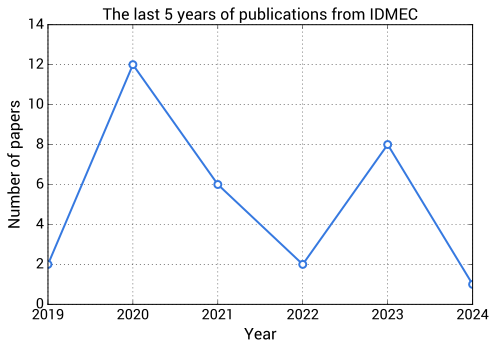

In [68]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.year.items()))

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.plot( year_dic.keys(), year_dic.values(), 'o-',
         linewidth=2, color='#3679e0',
         markersize=7, markerfacecolor='w', markeredgewidth=2,
         markeredgecolor='#3679e0' )
mpl.xlim( (2019, 2024) )
mpl.ylim( (0, 14) )
mpl.grid()
mpl.xlabel( 'Year' )
mpl.ylabel( 'Number of papers' )
mpl.title( "The last 5 years of publications from IDMEC" )#.set_fontname("Roboto condensed")


mpl.gca().set_axisbelow(True)
# mpl.gca().set_xticks( range( min( year_lst ), max( year_lst )+1, 2 ) );
# mpl.gca().set_xticks( range( 2018, 2023+1, 2 ) );
mpl.savefig( 'IDMEC_PubsLast5Years.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'IDMEC_PubsLast5Years.svg', bbox_inches='tight', pad_inches=0.02 )

# df_year_dic = {
#     'Year': year_dic.keys(),
#     'Num papers': year_dic.values()
# }

# df = pd.DataFrame( df_year_dic )
# df.index = df.index + 1
# df

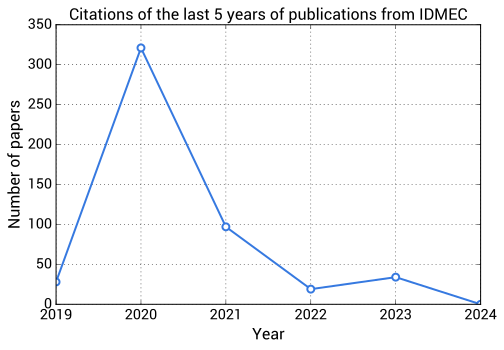

In [69]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.citations.items()))

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.plot( year_dic.keys(), year_dic.values(), 'o-',
         linewidth=2, color='#3679e0',
         markersize=7, markerfacecolor='w', markeredgewidth=2,
         markeredgecolor='#3679e0' )
mpl.xlim( (2019, 2024) )
# mpl.ylim( (0, 14) )
mpl.grid()
mpl.xlabel( 'Year' )
mpl.ylabel( 'Number of papers' )
mpl.title( "Citations of the last 5 years of publications from IDMEC" )#.set_fontname("Roboto condensed")


mpl.gca().set_axisbelow(True)
# mpl.gca().set_xticks( range( min( year_lst ), max( year_lst )+1, 2 ) );
# mpl.gca().set_xticks( range( 2018, 2023+1, 2 ) );
mpl.savefig( 'IDMEC_Citations_PubsLast5Years.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'IDMEC_Citations_PubsLast5Years.svg', bbox_inches='tight', pad_inches=0.02 )

# df_year_dic = {
#     'Year': year_dic.keys(),
#     'Num papers': year_dic.values()
# }

# df = pd.DataFrame( df_year_dic )
# df.index = df.index + 1
# df

# Citations per author

In [32]:
sorted_citations_dic = { k: v for k, v in sorted( papers_dic.items(), key=lambda item: item[1].citations, reverse=True ) }

df_citations_name_lst = []
df_citations_num_lst = []

df_citations_dic = {
        "Author": df_citations_name_lst,
        "Citations": df_citations_num_lst
}

for n, dt in enumerate( sorted_citations_dic.values() ):
    if n == max_entries: break
    df_citations_name_lst.append( dt.name )
    df_citations_num_lst.append( dt.citations )

df = pd.DataFrame( df_citations_dic )
df.index = df.index + 1
left_align( df.head(20) )

NameError: name 'papers_dic' is not defined

# Most cited papers

In [ ]:
@dataclass
class paper_rank:
    authors: str = None
    title: str = None
    journal: str =None
    year: int = 0
    DOI: str = None
    citations: int = 0

In [ ]:
papers_rank_dic = {}

for n, ( authors, title, journal, year, DOI, citations, stage ) in enumerate( zip( authors_lst, title_lst, journal_lst, year_lst, DOI_lst, citations_lst, stage_lst ) ):
    if stage == 'Final' and authors == authors: # check NANs
        papers_rank_dic[DOI] = paper_rank( authors, title, journal, year, DOI, int( citations ) )

In [ ]:
sorted_papers_rank_dic = { k: v for k, v in sorted( papers_rank_dic.items(), key=lambda item: item[1].citations, reverse=True ) }

df_authors_name_lst = []
df_title_lst = []
df_journal_lst = []
df_year_lst = []
df_DOI_lst = []
df_citations_lst = []

df_papers_rank_dic = {
        "Authors": df_authors_name_lst,
        "Title": df_title_lst,
        "Journal": df_journal_lst,
        "Year": df_year_lst,
        # "DOI": df_DOI_lst,
        "citations": df_citations_lst
}


for n, dt in enumerate( sorted_papers_rank_dic.values() ):
    df_authors_name_lst.append( dt.authors )
    df_title_lst.append( dt.title )
    df_journal_lst.append( dt.journal )
    df_year_lst.append( dt.year )
    df_DOI_lst.append( dt.DOI )
    df_citations_lst.append( dt.citations )

# df_authors_name_lst[0] = 'Falcão A.F.O.'

df = pd.DataFrame( df_papers_rank_dic )
df.index = df.index + 1
left_align( df.head(10) )

# Generate plot of the papers per year

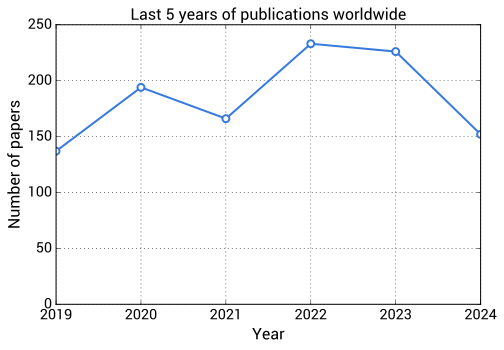

In [70]:
mpl.rc('font', family='Roboto')

# year_dic = {i:0 for i in range( min( year_lst ), max( year_lst )+1 ) }
year_dic = {i:0 for i in range( 2019, 2025+1 ) }

for n, ( year, stage ) in enumerate( zip( year_lst, stage_lst ) ):
    if stage == 'Final' and affiliations == affiliations: # detect NANs
        if year > 2002:
            year_dic[year] += 1

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.plot( year_dic.keys(), year_dic.values(), 'o-',
         linewidth=2, color='#3679e0',
         markersize=7, markerfacecolor='w', markeredgewidth=2,
         markeredgecolor='#3679e0' )
mpl.xlim( (2019, 2024) )
mpl.grid()
mpl.xlabel( 'Year' )
mpl.ylabel( 'Number of papers' )
mpl.title( "Last 5 years of publications worldwide" )#.set_fontname("Roboto condensed")


mpl.gca().set_axisbelow(True)
# mpl.gca().set_xticks( range( min( year_lst ), max( year_lst )+1, 2 ) );
# mpl.gca().set_xticks( range( 2018, 2023+1, 2 ) );
mpl.savefig( 'PubsLast5Years.pdf', bbox_inches='tight', pad_inches=0.02 )
mpl.savefig( 'PubsLast5Years.svg', bbox_inches='tight', pad_inches=0.02 )

# df_year_dic = {
#     'Year': year_dic.keys(),
#     'Num papers': year_dic.values()
# }

# df = pd.DataFrame( df_year_dic )
# df.index = df.index + 1
# df